<a href="https://colab.research.google.com/github/IssamMerikhi/CCD/blob/master/UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
gdp = pd.read_csv("GDP.csv")
inflation = pd.read_csv("InflationPourcentage.csv")
money = pd.read_csv("MoneyM3.csv")

In [28]:
print('gdp shape :', gdp.shape)
print('inflation shape :', inflation.shape)
print('money shape :', money.shape)

df = pd.merge(pd.merge(gdp,inflation),money)
print('df shape', df.shape)

gdp shape : (183, 2)
inflation shape : (807, 2)
money shape : (410, 2)
df shape (30, 4)


In [29]:
print(df.head(5))

         DATE  CLVMNACSCAB1GQUK  CPIIUKA  MABMM301GBM189S
0  1987-01-01          237048.3     3.20     2.629680e+11
1  1988-01-01          253600.0     3.76     3.048060e+11
2  1989-01-01          262361.5     5.24     3.560730e+11
3  1990-01-01          266386.8     6.97     4.279980e+11
4  1991-01-01          263277.6     7.53     4.672330e+11


In [32]:
df = df.rename(columns = {'DATE': 'date',
                          'CLVMNACSCAB1GQUK':'gdp',
                          'CPIIUKA':'inflation',
                          'MABMM301GBM189S':'money'}, inplace = False)
print(df.head(5))

         date       gdp  inflation         money
0  1987-01-01  237048.3       3.20  2.629680e+11
1  1988-01-01  253600.0       3.76  3.048060e+11
2  1989-01-01  262361.5       5.24  3.560730e+11
3  1990-01-01  266386.8       6.97  4.279980e+11
4  1991-01-01  263277.6       7.53  4.672330e+11


In [34]:
min_max_scaler = MinMaxScaler()

df[["gdp","inflation", "money"]] = min_max_scaler.fit_transform(df[["gdp", "inflation", "money"]])
print(df.head(5))

         date       gdp  inflation     money    
0  1987-01-01  0.000000   0.421896  0.000000 NaN
1  1988-01-01  0.078266   0.496662  0.019425 NaN
2  1989-01-01  0.119695   0.694259  0.043227 NaN
3  1990-01-01  0.138729   0.925234  0.076620 NaN
4  1991-01-01  0.124027   1.000000  0.094836 NaN


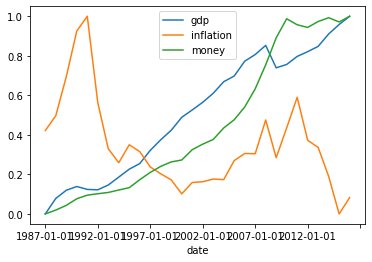

In [35]:
df.plot(x="date", y=["gdp", "inflation", "money"], kind="line")